In [1]:
import pandas as pd

DDA선택기준 

- 분석제공 대상선정: 컬럼 선택 기준 달라짐.

    - 환자 
    - 의사 
    - 병원 관계자 
    - 보호자


In [2]:
df_ROS = pd.read_csv('../../datasets/RecurrenceofSurgery.csv')
df_ROS.head(2)

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0


In [3]:
df_ROS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1894 non-null   int64  
 1   환자ID                    1894 non-null   object 
 2   Large Lymphocyte        1894 non-null   float64
 3   Location of herniation  1894 non-null   int64  
 4   ODI                     462 non-null    float64
 5   가족력                     1843 non-null   float64
 6   간질성폐질환                  1894 non-null   int64  
 7   고혈압여부                   1894 non-null   int64  
 8   과거수술횟수                  1894 non-null   int64  
 9   당뇨여부                    1894 non-null   int64  
 10  말초동맥질환여부                1894 non-null   int64  
 11  빈혈여부                    1894 non-null   int64  
 12  성별                      1894 non-null   int64  
 13  스테로이드치료                 1894 non-null   int64  
 14  신부전여부                   1894 non-null   

In [39]:
df_ROS_forpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1894 non-null   int64  
 1   신장      1894 non-null   int64  
 2   심혈관질환   1894 non-null   int64  
 3   체중      1894 non-null   float64
 4   흡연여부    1894 non-null   int64  
 5   연령      1894 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1894 non-null   object 
 8   재발여부    1894 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 133.3+ KB


### 데이터 핸들링

- 정렬 df.sort_values(by=['신장', '체중'], ignore_index=True, ascending=[False ,True])

- 추출
    - 열 단위 추출 : df[['','']], 컬럼 리스트로 한다.
    - 행 단위 추출 : #iloc[:3] : 0번째 행 ~ 2행까지
    
- 필터 : df.loc[conditions]

- 요약 : pivot_table(index =,values = aggfunc =)
    -index
    -values
    -aggfunc


### 환자 대상 분석


###환자 대상 분석 필요

0. 변수 구조 확인
1. 목표 변수 설정:'재발여부'정의
2. 실명변수 설정:#'성별, '신장','심혈관질환','체중','흡연여부','연령','직업','혈액형','재발여부'정의

In [4]:
df_ROS.columns

Index(['Unnamed: 0', '환자ID', 'Large Lymphocyte', 'Location of herniation',
       'ODI', '가족력', '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부',
       '성별', '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '입원일자', '종양진행여부', '직업', '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도',
       '흡연여부', '통증기간(월)', '수술기법', '수술시간', '수술실패여부', '수술일자', '재발여부', '혈액형',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증'],
      dtype='object')

In [5]:
# '성별','신장','심혈관질환','체중','흡연여부','연령','직업','혈액형', '재발여부'
#  열 단위 추출
#df_BOS['성별','신장','심혈관질환','체중','흡연여부','연령','직업','혈액형','재발여부']
df_ROS_forpatient = df_ROS[['성별','신장', '심혈관질환','체중','흡연여부', '연령', '직업', '혈액형', '재발여부']]
#df_ROS_forpatient.head(2)
df_ROS_forpatient.tail(3)

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
1891,1,167,0,70.0,0,61,무직,RH+O,0
1892,1,177,0,77.0,0,29,사무직,RH+A,0
1893,2,168,0,49.0,0,30,사무직,RH+AB,0


In [6]:
# 행 단위추출
# iLoc[:,:], head(), taiL()
df_ROS_forpatient.iloc[:3]    # 0번째 행 ~ 2행 까지


,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
0,2,163,0,60.3,0,66,자영업,RH+A,0
1,1,171,0,71.7,0,47,운동선수,RH+A,0
2,1,178,0,77.1,0,39,특수전문직,RH+B,0


In [7]:
df_ROS_forpatient.iloc[-4:]

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
1890,2,157,0,59.0,0,42,사무직,RH+B,0
1891,1,167,0,70.0,0,61,무직,RH+O,0
1892,1,177,0,77.0,0,29,사무직,RH+A,0
1893,2,168,0,49.0,0,30,사무직,RH+AB,0


index 관련 사항

In [8]:
df_ROS.set_index('환자ID') # 유니크한 컬럼

,Unnamed: 0,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
환자ID,,,,,,,,,,,,,,,,,,,,,
1PT,0,22.8,3,51.0,0.0,0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.50,4,Down,0
2PT,1,44.9,4,26.0,0.0,0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.10,4,Up,0
3PT,2,53.0,3,NaN,0.0,0,0,1,0,0,...,0,67.5,27.3,10.2,0,-1.77,1749.00,4,Down,0
4PT,3,54.7,4,18.0,0.0,0,1,0,0,0,...,0,49.2,18.7,19.9,0,-1.58,1796.20,4,Down,0
5PT,4,53.8,4,NaN,0.0,0,1,0,0,0,...,0,58.8,14.7,5.2,0,-0.79,2021.48,4,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890PT,1889,44.0,1,NaN,0.0,0,0,0,0,0,...,2,59.5,23.0,21.8,0,NaN,2652.20,5,Middle,0
1891PT,1890,30.8,2,NaN,0.0,0,0,0,0,0,...,0,47.7,20.2,5.0,0,NaN,1795.80,4,Down,0
1892PT,1891,36.7,3,NaN,0.0,0,0,0,0,1,...,0,44.6,15.0,17.4,1,NaN,2624.40,4,Down,0


In [9]:
df_ROS.set_index('성별') # 유니크 하지 않은 컬럼

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
성별,,,,,,,,,,,,,,,,,,,,,
2,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.50,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.10,4,Up,0
1,2,3PT,53.0,3,NaN,0.0,0,0,1,0,...,0,67.5,27.3,10.2,0,-1.77,1749.00,4,Down,0
1,3,4PT,54.7,4,18.0,0.0,0,1,0,0,...,0,49.2,18.7,19.9,0,-1.58,1796.20,4,Down,0
1,4,5PT,53.8,4,NaN,0.0,0,1,0,0,...,0,58.8,14.7,5.2,0,-0.79,2021.48,4,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,1889,1890PT,44.0,1,NaN,0.0,0,0,0,0,...,2,59.5,23.0,21.8,0,NaN,2652.20,5,Middle,0
2,1890,1891PT,30.8,2,NaN,0.0,0,0,0,0,...,0,47.7,20.2,5.0,0,NaN,1795.80,4,Down,0
1,1891,1892PT,36.7,3,NaN,0.0,0,0,0,0,...,0,44.6,15.0,17.4,1,NaN,2624.40,4,Down,0


In [10]:
### 정렬
df_ROS_forpatient.sort_values(by=['신장'])

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
1763,2,140,1,35.0,0,86,무직,RH+O,0
896,2,140,0,35.0,0,48,NaN,RH+A,0
348,2,142,0,52.9,0,38,자영업,RH+A,0
70,2,143,0,53.3,0,31,사무직,RH+O,0
974,2,143,0,56.0,0,56,무직,RH+O,0
...,...,...,...,...,...,...,...,...,...
202,1,189,0,85.3,0,22,군인,RH+B,0
464,1,189,0,85.9,0,39,자영업,RH+A,0
1227,1,190,0,74.0,0,47,자영업,RH+O,0
1246,1,191,0,114.0,0,17,학생,RH+O,0


In [11]:
df_ROS_forpatient.sort_values (by=['신장'])

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
1763,2,140,1,35.0,0,86,무직,RH+O,0
896,2,140,0,35.0,0,48,NaN,RH+A,0
348,2,142,0,52.9,0,38,자영업,RH+A,0
70,2,143,0,53.3,0,31,사무직,RH+O,0
974,2,143,0,56.0,0,56,무직,RH+O,0
...,...,...,...,...,...,...,...,...,...
202,1,189,0,85.3,0,22,군인,RH+B,0
464,1,189,0,85.9,0,39,자영업,RH+A,0
1227,1,190,0,74.0,0,47,자영업,RH+O,0
1246,1,191,0,114.0,0,17,학생,RH+O,0


In [12]:
df_ROS_forpatient.sort_values(by=['신장', '체중'], ascending=[False, False])

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
1579,1,204,0,103.0,0,39,교사,RH+O,1
1246,1,191,0,114.0,0,17,학생,RH+O,0
1227,1,190,0,74.0,0,47,자영업,RH+O,0
464,1,189,0,85.9,0,39,자영업,RH+A,0
202,1,189,0,85.3,0,22,군인,RH+B,0
...,...,...,...,...,...,...,...,...,...
974,2,143,0,56.0,0,56,무직,RH+O,0
70,2,143,0,53.3,0,31,사무직,RH+O,0
348,2,142,0,52.9,0,38,자영업,RH+A,0
896,2,140,0,35.0,0,48,NaN,RH+A,0


## quest1
 정렬 : 혈액형(ascending), 직업(descending)
- 추출 : 혈액형, 직업, 성별 --> 표시

In [13]:
df_ROS_forpatient.sort_values(by=['혈액형'])

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
0,2,163,0,60.3,0,66,자영업,RH+A,0
508,1,179,0,78.3,0,45,주부,RH+A,0
1284,1,172,0,59.0,0,55,사무직,RH+A,0
1281,1,177,0,75.0,1,25,사무직,RH+A,0
512,1,168,0,69.7,0,34,공무원,RH+A,0
...,...,...,...,...,...,...,...,...,...
635,1,171,0,85.0,0,42,교사,RH+O,1
350,1,174,1,73.8,1,52,사무직,RH+O,0
1451,2,156,0,55.0,0,52,무직,RH+O,0
358,1,175,0,74.7,0,35,사무직,RH+O,0


In [14]:
df_ROS_forpatient.sort_values(by=['직업'])

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
1247,1,180,1,76.0,1,39,건설업,RH+B,0
31,1,173,0,73.4,0,30,건설업,RH+B,0
1756,1,174,0,76.0,0,54,건설업,RH+A,0
1038,1,174,1,80.0,0,56,건설업,RH+O,1
1527,1,167,0,70.0,0,50,건설업,RH+B,0
...,...,...,...,...,...,...,...,...,...
1722,2,158,1,55.9,1,60,NaN,RH+B,0
1726,1,169,0,75.0,0,49,NaN,RH+O,0
1729,2,158,0,47.0,0,25,NaN,RH+A,0
1736,1,173,0,75.7,1,47,NaN,RH+A,0


In [15]:
df_ROS[['직업']].value_counts() 

직업   
사무직      449
자영업      171
무직       164
학생       135
주부       114
군인        90
공무원       51
운수업       50
노동직       42
농업        40
의료직       40
사업가       39
교사        30
특수전문직     23
건설업       17
운동선수      14
예술가       10
dtype: int64

In [16]:
df_ROS_forpatient.sort_values(by=['성별'])

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
946,1,173,0,70.0,1,48,NaN,RH+B,0
880,1,170,0,66.0,0,21,학생,RH+A,0
1553,1,177,0,61.0,1,18,학생,RH+A,0
877,1,174,0,69.0,0,44,노동직,RH+AB,0
1554,1,176,0,80.0,0,52,사무직,RH+B,1
...,...,...,...,...,...,...,...,...,...
910,2,149,1,61.0,0,46,사업가,RH+A,0
912,2,153,0,60.0,1,38,사무직,RH+A,0
913,2,153,0,60.0,1,38,사무직,RH+A,1
920,2,162,0,56.0,0,32,운동선수,RH+A,0


In [17]:
df_ROS_au = df_ROS.loc[df_ROS['직업'] == '자영업']
df_ROS_au

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
5,5,6PT,28.5,3,NaN,0.0,0,0,2,0,...,0,41.8,23.6,8.8,0,-0.95,1937.5,4,Down,0
11,11,12PT,53.2,3,39.0,0.0,0,0,0,0,...,2,37.2,8.9,13.5,1,-1.35,2119.3,4,Middle,0
47,47,48PT,55.5,3,40.0,0.0,0,0,0,0,...,0,56.6,11.6,7.5,0,-1.75,1476.8,4,Down,0
49,49,50PT,47.9,2,NaN,0.0,0,1,1,0,...,0,40.8,7.5,10.7,0,-1.51,2263.3,4,Middle,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845,1845,1846PT,43.8,2,NaN,0.0,0,0,0,0,...,0,41.9,11.6,4.7,0,NaN,2526.5,2,Middle,0
1849,1849,1850PT,47.4,2,NaN,0.0,0,0,0,0,...,0,47.5,13.2,14.2,0,NaN,1871.2,5,Middle,0
1874,1874,1875PT,30.8,4,19.0,0.0,0,0,0,0,...,2,43.6,17.7,9.1,0,NaN,2250.8,4,Middle,0
1883,1883,1884PT,25.4,3,NaN,0.0,0,1,0,0,...,0,55.2,25.1,11.5,0,NaN,2381.2,4,Down,0


## quest2
- 직업군이 상위 1, 2위 항목 : value_count, iloc
- 체중 > 70, 신장 > 170, 흡연여부 없는 분
- 해당 레코드 갯수 표현
- option : value_count 결과 변수로 활용

In [18]:
# condition = (df_ROS_au['체중'] > 70) & (df_ROS_au['신장'] > 180) & (df_ROS_au['흡연여부'] == 0)
df_ROS_end = df_ROS_au.loc[(df_ROS_au['체중'] > 70) & (df_ROS_au['신장'] > 170) & (df_ROS_au['흡연여부'] == 0)]
df_ROS_end

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
72,72,73PT,34.6,2,NaN,0.0,0,0,0,0,...,0,38.4,16.2,16.10,0,-2.34,2387.10,3,Down,0
100,100,101PT,50.2,3,NaN,0.0,0,0,0,0,...,0,47.3,7.4,17.70,0,-2.00,2207.81,5,Middle,0
135,135,136PT,36.1,3,42.0,0.0,0,0,1,0,...,0,48.1,10.9,10.10,0,-0.67,2375.60,4,Middle,0
148,148,149PT,26.7,2,35.0,0.0,0,0,0,0,...,0,45.3,15.1,7.70,0,-1.19,2235.80,4,Middle,0
167,167,168PT,38.6,1,NaN,0.0,0,0,1,0,...,0,40.8,13.6,21.70,0,-1.92,2068.51,4,Extremely down,0
177,177,178PT,20.2,2,NaN,0.0,0,0,1,0,...,0,36.0,19.2,12.60,0,-1.31,2325.13,4,Middle,0
220,220,221PT,55.2,3,NaN,0.0,0,0,1,0,...,0,51.6,12.0,14.00,0,-0.86,1914.67,4,Down,0
275,275,276PT,40.8,3,NaN,0.0,0,0,0,0,...,0,559.0,23.8,18.30,0,-1.80,1954.30,4,Middle,0
316,316,317PT,58.4,1,NaN,0.0,0,0,0,0,...,0,57.5,18.4,14.30,0,-0.83,1473.30,4,Down,0
380,380,381PT,46.4,3,NaN,0.0,0,0,0,0,...,0,43.1,9.7,30.60,0,-1.00,1693.50,4,Middle,0


##동환님꺼 복사 붙혀 넣기 함 위에

In [19]:
df_ROS_au = df_ROS.loc[df_ROS['직업'] == '주부']
df_ROS_au

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
3,3,4PT,54.7,4,18.0,0.0,0,1,0,0,...,0,49.2,18.7,19.9,0,-1.58,1796.20,4,Down,0
15,15,16PT,23.3,4,22.0,0.0,0,0,0,0,...,2,40.2,14.1,13.8,0,-2.12,2155.30,4,Down,0
16,16,17PT,45.4,3,NaN,0.0,0,0,0,0,...,0,38.8,12.7,14.7,0,-1.52,2408.90,4,Down,0
36,36,37PT,25.2,3,NaN,0.0,0,0,0,0,...,0,31.8,6.0,16.8,0,-1.17,2086.90,4,Middle,0
41,41,42PT,22.0,3,NaN,0.0,0,0,0,0,...,0,46.0,24.0,6.0,1,-2.33,1602.69,4,Down,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1846,1846,1847PT,38.0,2,NaN,0.0,0,0,2,1,...,0,59.9,25.5,15.3,0,NaN,1725.50,4,Middle,0
1848,1848,1849PT,21.4,2,NaN,0.0,0,0,0,0,...,0,45.9,23.8,12.7,0,NaN,1800.50,4,Down,1
1859,1859,1860PT,47.7,1,NaN,0.0,0,0,0,0,...,2,46.1,13.5,17.2,0,NaN,1896.40,4,Down,0
1864,1864,1865PT,50.1,2,NaN,0.0,0,0,0,0,...,0,48.3,15.6,34.3,0,NaN,1691.90,5,Middle,0


In [20]:
df_ROS_end = df_ROS_au.loc[(df_ROS_au['체중'] > 70) & (df_ROS_au['신장'] > 170) & (df_ROS_au['흡연여부'] == 0)]
df_ROS_end

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
3,3,4PT,54.7,4,18.0,0.0,0,1,0,0,...,0,49.2,18.7,19.9,0,-1.58,1796.20,4,Down,0
120,120,121PT,46.1,4,NaN,0.0,0,0,0,0,...,0,37.1,1.6,16.6,0,-1.76,2287.70,4,Middle,0
125,125,126PT,51.2,3,26.0,0.0,0,0,0,0,...,0,57.6,18.6,10.6,0,-1.18,1803.40,4,Down,0
280,280,281PT,62.4,3,NaN,0.0,0,0,0,0,...,0,64.2,18.4,21.5,0,-1.80,2033.00,4,Middle,0
336,336,337PT,26.7,2,NaN,0.0,0,0,0,0,...,0,40.5,17.1,26.5,0,-2.43,2184.70,4,Middle,0
364,364,365PT,43.7,1,NaN,0.0,0,1,0,0,...,0,34.3,2.3,23.7,0,-1.70,1942.75,4,Middle,0
434,434,435PT,32.5,3,NaN,0.0,0,0,0,0,...,0,48.6,18.2,4.5,0,-1.57,1824.00,3,Middle,0
461,461,462PT,51.1,1,NaN,0.0,0,0,0,0,...,0,42.1,7.0,24.9,0,-1.90,2102.30,4,Extremely down,0
508,508,509PT,52.3,3,27.0,0.0,0,0,1,0,...,0,54.2,17.1,25.8,0,-1.82,1665.80,4,Down,0
516,516,517PT,54.1,2,18.0,0.0,0,0,0,0,...,0,47.0,5.7,4.4,0,-1.83,1718.90,4,Down,0


In [21]:
list(df_ROS_forpatient['직업'].value_counts().iloc[:2].index)

['사무직', '자영업']

In [22]:
df_ROS_forpatient['직업'].value_counts().index[0]

'사무직'

In [23]:
df_ROS_forpatient['직업'].value_counts().index[1]

'자영업'

In [24]:
df_ROS_forpatient['직업'].value_counts().iloc[:2].values

array([449, 171], dtype=int64)

# quest3
quesr2 최종 데이터 사용
- 직업별 성별 빈도
- 직업별 혈액형 빈도

- quest2 최종 데이터 사용
- 직업별 성별 빈도 : np.size
- 직업별 혈액형 빈도 : np.size
- hint : index=['직업', '성별']

In [25]:
df_ROS_au = df_ROS.loc[df_ROS['직업'] == '자영업']
df_ROS_au

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
5,5,6PT,28.5,3,NaN,0.0,0,0,2,0,...,0,41.8,23.6,8.8,0,-0.95,1937.5,4,Down,0
11,11,12PT,53.2,3,39.0,0.0,0,0,0,0,...,2,37.2,8.9,13.5,1,-1.35,2119.3,4,Middle,0
47,47,48PT,55.5,3,40.0,0.0,0,0,0,0,...,0,56.6,11.6,7.5,0,-1.75,1476.8,4,Down,0
49,49,50PT,47.9,2,NaN,0.0,0,1,1,0,...,0,40.8,7.5,10.7,0,-1.51,2263.3,4,Middle,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845,1845,1846PT,43.8,2,NaN,0.0,0,0,0,0,...,0,41.9,11.6,4.7,0,NaN,2526.5,2,Middle,0
1849,1849,1850PT,47.4,2,NaN,0.0,0,0,0,0,...,0,47.5,13.2,14.2,0,NaN,1871.2,5,Middle,0
1874,1874,1875PT,30.8,4,19.0,0.0,0,0,0,0,...,2,43.6,17.7,9.1,0,NaN,2250.8,4,Middle,0
1883,1883,1884PT,25.4,3,NaN,0.0,0,1,0,0,...,0,55.2,25.1,11.5,0,NaN,2381.2,4,Down,0


In [26]:
df_ROS_au = df_ROS.loc[df_ROS['직업'] == '자영업']
df_ROS_au

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
5,5,6PT,28.5,3,NaN,0.0,0,0,2,0,...,0,41.8,23.6,8.8,0,-0.95,1937.5,4,Down,0
11,11,12PT,53.2,3,39.0,0.0,0,0,0,0,...,2,37.2,8.9,13.5,1,-1.35,2119.3,4,Middle,0
47,47,48PT,55.5,3,40.0,0.0,0,0,0,0,...,0,56.6,11.6,7.5,0,-1.75,1476.8,4,Down,0
49,49,50PT,47.9,2,NaN,0.0,0,1,1,0,...,0,40.8,7.5,10.7,0,-1.51,2263.3,4,Middle,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845,1845,1846PT,43.8,2,NaN,0.0,0,0,0,0,...,0,41.9,11.6,4.7,0,NaN,2526.5,2,Middle,0
1849,1849,1850PT,47.4,2,NaN,0.0,0,0,0,0,...,0,47.5,13.2,14.2,0,NaN,1871.2,5,Middle,0
1874,1874,1875PT,30.8,4,19.0,0.0,0,0,0,0,...,2,43.6,17.7,9.1,0,NaN,2250.8,4,Middle,0
1883,1883,1884PT,25.4,3,NaN,0.0,0,1,0,0,...,0,55.2,25.1,11.5,0,NaN,2381.2,4,Down,0


### quest 4
- 분석 제공 대상이 의사
- 목표변수 : '수술 시간'
- 설명 변수 지정 최소5개 이상(범주형과 연속형 섞여 있음)
-DDA/REAAME.MD:  변수 설명/데이터 TYPE/이유
-요약 : 수술 시간에 가장 영향을 주는 항목목 3가지 확인

In [27]:
df_ROS_au = df_ROS.loc[df_ROS['직업'] == '자영업']
df_ROS_au

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
5,5,6PT,28.5,3,NaN,0.0,0,0,2,0,...,0,41.8,23.6,8.8,0,-0.95,1937.5,4,Down,0
11,11,12PT,53.2,3,39.0,0.0,0,0,0,0,...,2,37.2,8.9,13.5,1,-1.35,2119.3,4,Middle,0
47,47,48PT,55.5,3,40.0,0.0,0,0,0,0,...,0,56.6,11.6,7.5,0,-1.75,1476.8,4,Down,0
49,49,50PT,47.9,2,NaN,0.0,0,1,1,0,...,0,40.8,7.5,10.7,0,-1.51,2263.3,4,Middle,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845,1845,1846PT,43.8,2,NaN,0.0,0,0,0,0,...,0,41.9,11.6,4.7,0,NaN,2526.5,2,Middle,0
1849,1849,1850PT,47.4,2,NaN,0.0,0,0,0,0,...,0,47.5,13.2,14.2,0,NaN,1871.2,5,Middle,0
1874,1874,1875PT,30.8,4,19.0,0.0,0,0,0,0,...,2,43.6,17.7,9.1,0,NaN,2250.8,4,Middle,0
1883,1883,1884PT,25.4,3,NaN,0.0,0,1,0,0,...,0,55.2,25.1,11.5,0,NaN,2381.2,4,Down,0


In [28]:
# 직업별 성별 빈도
df_ROS_forpatient['직업'].value_counts().iloc[:2]

사무직    449
자영업    171
Name: 직업, dtype: int64

In [29]:
df_ROS_forpatient.describe(include=object)[:2]# 범주형

,직업,혈액형
count,1479,1894
unique,17,4


In [30]:
df_ROS_forpatient.dtypes

성별         int64
신장         int64
심혈관질환      int64
체중       float64
흡연여부       int64
연령         int64
직업        object
혈액형       object
재발여부       int64
dtype: object

### 데이터 타입 변환 
- int,float-> src(object)
- object-> int or flsat(소수점 있는 경우)

In [31]:
 df_ROS_forpatient['흡연여부'].astype(str)      

0       0
1       0
2       0
3       0
4       0
       ..
1889    0
1890    0
1891    0
1892    0
1893    0
Name: 흡연여부, Length: 1894, dtype: object

In [32]:
 df_ROS_forpatient['재발여부'].astype(str)      

0       0
1       0
2       0
3       0
4       0
       ..
1889    0
1890    0
1891    0
1892    0
1893    0
Name: 재발여부, Length: 1894, dtype: object

In [33]:
 df_ROS_forpatient['성별'].astype(str)      
 df_ROS_forpatient['심혈관질환'].astype(str)    

0       0
1       0
2       0
3       0
4       0
       ..
1889    0
1890    0
1891    0
1892    0
1893    0
Name: 심혈관질환, Length: 1894, dtype: object

In [34]:
df_ROS_forpatient.dropna

<bound method DataFrame.dropna of       성별   신장  심혈관질환    체중  흡연여부  연령     직업    혈액형  재발여부
0      2  163      0  60.3     0  66    자영업   RH+A     0
1      1  171      0  71.7     0  47   운동선수   RH+A     0
2      1  178      0  77.1     0  39  특수전문직   RH+B     0
3      1  174      0  74.2     0  40     주부   RH+O     0
4      1  183      0  80.7     0  42  특수전문직   RH+A     0
...   ..  ...    ...   ...   ...  ..    ...    ...   ...
1889   2  157      0  64.0     0  59     무직   RH+A     0
1890   2  157      0  59.0     0  42    사무직   RH+B     0
1891   1  167      0  70.0     0  61     무직   RH+O     0
1892   1  177      0  77.0     0  29    사무직   RH+A     0
1893   2  168      0  49.0     0  30    사무직  RH+AB     0

[1894 rows x 9 columns]>

In [35]:
df_ROS_forpatient.describe()

,성별,신장,심혈관질환,체중,흡연여부,연령,재발여부
count,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000
mean,1.383316,168.027983,0.035903,68.111140,0.217001,41.463569,0.119852
std,0.486323,9.211419,0.186097,11.234318,0.412312,13.444629,0.324874
min,1.000000,140.000000,0.000000,35.000000,0.000000,15.000000,0.000000
25%,1.000000,161.000000,0.000000,59.700000,0.000000,32.000000,0.000000
50%,1.000000,169.000000,0.000000,68.000000,0.000000,41.000000,0.000000
75%,2.000000,175.000000,0.000000,75.000000,0.000000,49.000000,0.000000
max,2.000000,204.000000,1.000000,136.100000,1.000000,86.000000,1.000000


In [36]:
continuos_list = df_ROS_forpatient.describe().columns.to_list()

In [37]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='Malgun Gothic')
import seaborn as sns


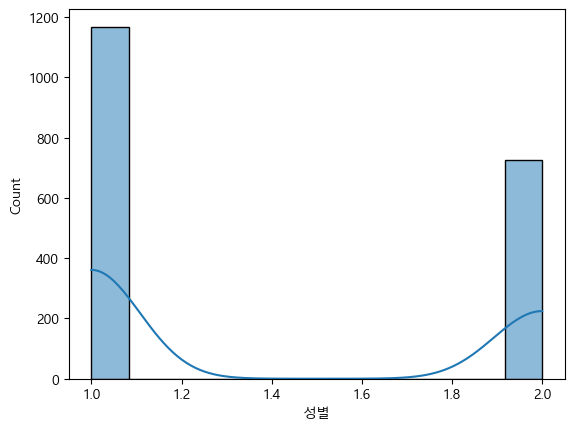

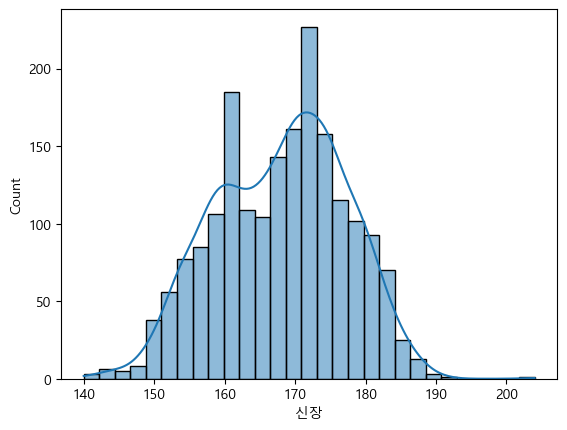

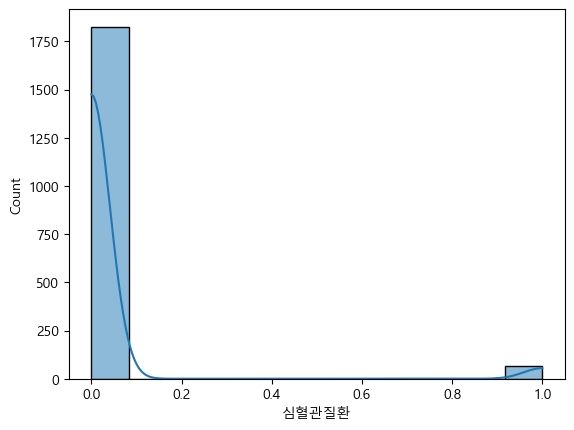

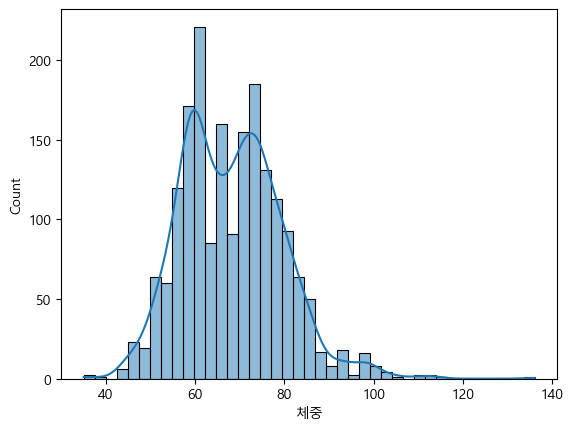

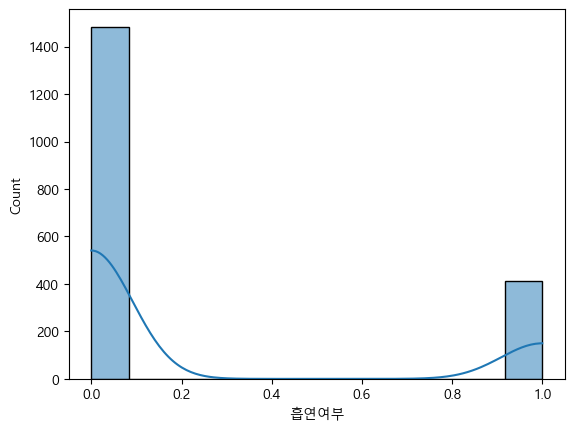

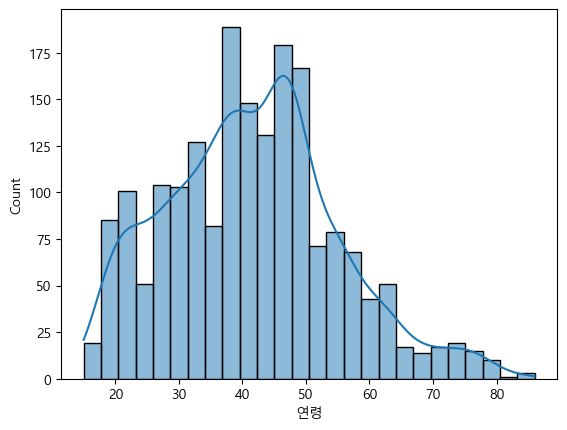

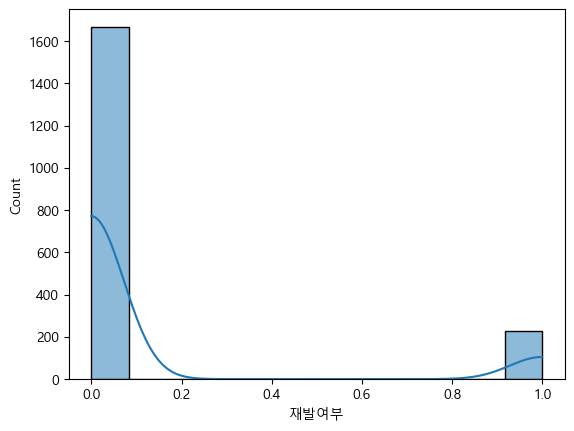

In [38]:
for continuos in continuos_list : 
    sns.histplot(data=df_ROS_forpatient, x=continuos,kde =True)
    plt.show()